In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# PS08 Galaxy Shape Model

In [2]:
from galaxy_shapes.shape_models.shape_model_componenets import PS08Shapes
elliptical_model_all = PS08Shapes(morphology='spiral', sample='all')
elliptical_model_1 = PS08Shapes(morphology='spiral', sample='luminosity_sample_1')
elliptical_model_2 = PS08Shapes(morphology='spiral', sample='luminosity_sample_2')
elliptical_model_3 = PS08Shapes(morphology='spiral', sample='luminosity_sample_3')
elliptical_model_4 = PS08Shapes(morphology='spiral', sample='luminosity_sample_4')

In [3]:
from intrinsic_alignments.ia_models.ia_model_components import RandomAlignment
orientation_model = RandomAlignment()

In [4]:
from galaxy_shapes.shape_models.shape_model_componenets import ProjectedShapes
projected_shape_model = ProjectedShapes()

In [5]:
def obs_func(shape_model, orientation_model, projected_shape_model, size=1e5):
    size=int(size)
    b_to_a = shape_model.assign_b_to_a(size=size)
    c_to_a, b_to_a, c_to_b = shape_model.assign_c_to_a(b_to_a=b_to_a)
    major_v, inter_v, minor_v = orientation_model.assign_orientation(size=size)
    proj_b_to_a = projected_shape_model.assign_projected_b_to_a(minor_axis=minor_v,
                                              inter_axis=inter_v,
                                              major_axis=major_v,
                                              b_to_a = b_to_a,
                                              c_to_a = c_to_a)
    return proj_b_to_a

In [6]:
proj_b_to_a_all = obs_func(elliptical_model_all, orientation_model, projected_shape_model)
proj_b_to_a_1 = obs_func(elliptical_model_1, orientation_model, projected_shape_model)
proj_b_to_a_2 = obs_func(elliptical_model_2, orientation_model, projected_shape_model)
proj_b_to_a_3 = obs_func(elliptical_model_3, orientation_model, projected_shape_model)
proj_b_to_a_4 = obs_func(elliptical_model_4, orientation_model, projected_shape_model)

In [34]:
# calculate the distribution of shapes
bins = np.linspace(0,1,20)

e = 1 - proj_b_to_a_all
counts_all = np.histogram(e, bins=bins)[0]
counts_all = counts_all/np.sum(counts_all)/np.diff(bins)

e = 1 - proj_b_to_a_1
counts_1 = np.histogram(e, bins=bins)[0]
counts_1 = counts_1/np.sum(counts_1)/np.diff(bins)

e = 1 - proj_b_to_a_2
counts_2 = np.histogram(e, bins=bins)[0]
counts_2 = counts_2/np.sum(counts_2)/np.diff(bins)

e = 1 - proj_b_to_a_3
counts_3 = np.histogram(e, bins=bins)[0]
counts_3 = counts_3/np.sum(counts_3)/np.diff(bins)

e = 1 - proj_b_to_a_4
counts_4 = np.histogram(e, bins=bins)[0]
counts_4 = counts_4/np.sum(counts_4)/np.diff(bins)

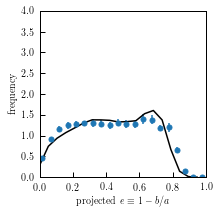

In [35]:
# load PS08 data
from astropy.table import Table

# open elliptical data
t = Table.read('../data/PS08/figure_7.dat', format='ascii')
x = 1-t['b/a']
y = t['normalized_frequency']
err = np.fabs(t['error_+'] - t['error_-'])/2.0

# 2D shape distribution
fig = plt.figure(figsize=(3.3,3.3))

# main panel
rect = 0.2, 0.2, 0.7, 0.7  # left, bottom, width, height
ax = fig.add_axes(rect)
l1, = ax.plot(bins[:-1], counts_all, color='black')
p1 = ax.errorbar(x, y, yerr=err, fmt='o', ms=5)
ax.set_xlim([0,1])
ax.set_ylim([0,4])
ax.set_xlabel(r'${\rm projected}~e \equiv 1 - b/a$')
ax.set_ylabel('frequency')
plt.show()

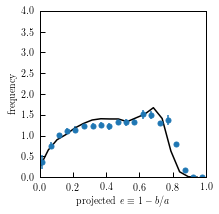

In [36]:
# load PS08 data
from astropy.table import Table

# open elliptical data
t = Table.read('../data/PS08/figure_8a.dat', format='ascii')
x1 = 1-t['b/a']
y1 = t['normalized_frequency']
err1 = np.fabs(t['error_+'] - t['error_-'])/2.0

# 2D shape distribution
fig = plt.figure(figsize=(3.3,3.3))

# main panel
rect = 0.2, 0.2, 0.7, 0.7  # left, bottom, width, height
ax = fig.add_axes(rect)
l1, = ax.plot(bins[:-1], counts_1, color='black')
p1 = ax.errorbar(x1, y1, yerr=err1, fmt='o', ms=5)
ax.set_xlim([0,1])
ax.set_ylim([0,4])
ax.set_xlabel(r'${\rm projected}~e \equiv 1 - b/a$')
ax.set_ylabel('frequency')
plt.show()

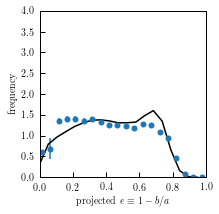

In [37]:
# load PS08 data
from astropy.table import Table

# open elliptical data
t = Table.read('../data/PS08/figure_8b.dat', format='ascii')
x2 = 1-t['b/a']
y2 = t['normalized_frequency']
err2 = np.fabs(t['error_+'] - t['error_-'])/2.0

# 2D shape distribution
fig = plt.figure(figsize=(3.3,3.3))

# main panel
rect = 0.2, 0.2, 0.7, 0.7  # left, bottom, width, height
ax = fig.add_axes(rect)
l1, = ax.plot(bins[:-1], counts_2, color='black')
p1 = ax.errorbar(x2, y2, yerr=err2, fmt='o', ms=5)
ax.set_xlim([0,1])
ax.set_ylim([0,4])
ax.set_xlabel(r'${\rm projected}~e \equiv 1 - b/a$')
ax.set_ylabel('frequency')
plt.show()

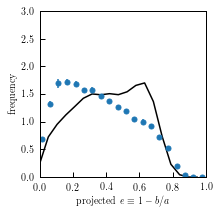

In [46]:
# load PS08 data
from astropy.table import Table

# open elliptical data
t = Table.read('../data/PS08/figure_8c.dat', format='ascii')
x3 = 1-t['b/a']
y3 = t['normalized_frequency']
err3 = np.fabs(t['error_+'] - t['error_-'])/2.0

# 2D shape distribution
fig = plt.figure(figsize=(3.3,3.3))

# main panel
rect = 0.2, 0.2, 0.7, 0.7  # left, bottom, width, height
ax = fig.add_axes(rect)
l1, = ax.plot(bins[:-1], counts_3, color='black')
p1 = ax.errorbar(x3, y3, yerr=err3, fmt='o', ms=5)
ax.set_xlim([0,1])
ax.set_ylim([0,3])
ax.set_xlabel(r'${\rm projected}~e \equiv 1 - b/a$')
ax.set_ylabel('frequency')
plt.show()

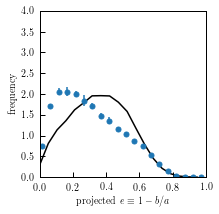

In [47]:
# load PS08 data
from astropy.table import Table

# open elliptical data
t = Table.read('../data/PS08/figure_8d.dat', format='ascii')
x4 = 1-t['b/a']
y4 = t['normalized_frequency']
err4 = np.fabs(t['error_+'] - t['error_-'])/2.0

# 2D shape distribution
fig = plt.figure(figsize=(3.3,3.3))

# main panel
rect = 0.2, 0.2, 0.7, 0.7  # left, bottom, width, height
ax = fig.add_axes(rect)
l1, = ax.plot(bins[:-1], counts_4, color='black')
p1 = ax.errorbar(x4, y4, yerr=err4, fmt='o', ms=5)
ax.set_xlim([0,1])
ax.set_ylim([0,4])
ax.set_xlabel(r'${\rm projected}~e \equiv 1 - b/a$')
ax.set_ylabel('frequency')
plt.show()

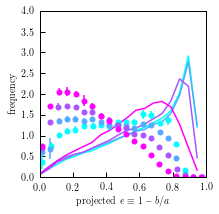

In [21]:
# load PS08 data
from astropy.table import Table

# open elliptical data
t = Table.read('../data/PS08/figure_5d.dat', format='ascii')
x = 1-t['b/a']
y = t['normalized_frequency']
err = np.fabs(t['error_+'] - t['error_-'])

colors = plt.cm.cool(np.linspace(0,1,4))

# 2D shape distribution
fig = plt.figure(figsize=(3.3,3.3))

# main panel
rect = 0.2, 0.2, 0.7, 0.7  # left, bottom, width, height
ax = fig.add_axes(rect)
l1, = ax.plot(bins[:-1], counts_1, color=colors[0])
l1, = ax.plot(bins[:-1], counts_2, color=colors[1])
l1, = ax.plot(bins[:-1], counts_3, color=colors[2])
l1, = ax.plot(bins[:-1], counts_4, color=colors[3])
p1 = ax.errorbar(x1, y1, yerr=err1, fmt='o', ms=5, color=colors[0])
p1 = ax.errorbar(x2, y2, yerr=err2, fmt='o', ms=5, color=colors[1])
p1 = ax.errorbar(x3, y3, yerr=err3, fmt='o', ms=5, color=colors[2])
p1 = ax.errorbar(x4, y4, yerr=err4, fmt='o', ms=5, color=colors[3])
ax.set_xlim([0,1])
ax.set_ylim([0,4])
ax.set_xlabel(r'${\rm projected}~e \equiv 1 - b/a$')
ax.set_ylabel('frequency')
plt.show()

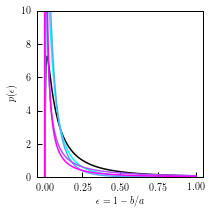

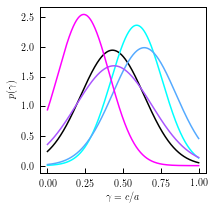

In [39]:
# examine shape distribution model
x = np.linspace(0,1,1000)

epsilon_all = elliptical_model_all.epsilon_pdf(x)
gamma_all = elliptical_model_all.gamma_pdf(x)

epsilon_1 = elliptical_model_1.epsilon_pdf(x)
gamma_1 = elliptical_model_1.gamma_pdf(x)

epsilon_2 = elliptical_model_2.epsilon_pdf(x)
gamma_2 = elliptical_model_2.gamma_pdf(x)

epsilon_3 = elliptical_model_3.epsilon_pdf(x)
gamma_3 = elliptical_model_3.gamma_pdf(x)

epsilon_4 = elliptical_model_4.epsilon_pdf(x)
gamma_4 = elliptical_model_4.gamma_pdf(x)

colors = plt.cm.cool(np.linspace(0,1,4))

fig = plt.figure(figsize=(3.3,3.3))
rect = 0.2, 0.2, 0.7, 0.7  # left, bottom, width, height
ax = fig.add_axes(rect)
l1, = ax.plot(x, epsilon_all, color='black')
l1, = ax.plot(x, epsilon_1, color=colors[0])
l1, = ax.plot(x, epsilon_2, color=colors[1])
l1, = ax.plot(x, epsilon_3, color=colors[2])
l1, = ax.plot(x, epsilon_4, color=colors[3])
ax.set_xlabel(r'$\epsilon = 1-b/a$')
ax.set_ylabel(r'$p(\epsilon)$')
#ax.set_yscale('log')
ax.set_ylim([0.01,10])
plt.show()

fig = plt.figure(figsize=(3.3,3.3))
rect = 0.2, 0.2, 0.7, 0.7  # left, bottom, width, height
ax = fig.add_axes(rect)
l1, = ax.plot(x, gamma_all, color='black')
l1, = ax.plot(x, gamma_1, color=colors[0])
l1, = ax.plot(x, gamma_2, color=colors[1])
l1, = ax.plot(x, gamma_3, color=colors[2])
l1, = ax.plot(x, gamma_4, color=colors[3])
ax.set_xlabel(r'$\gamma = c/a$')
ax.set_ylabel(r'$p(\gamma)$')
plt.show()
